In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [64]:
csv_file_path = './weather_data.csv'
raw_df = pd.read_csv(csv_file_path)
df = raw_df
df.head()

,date,avg_temperature,humidity,avg_wind_speed,rain_or_not,cloud_cover,pressure
0,2023-01-01,23.745401,46.140905,7.845981,Rain,20.851051,992.965681
1,2023-01-02,30.030503,59.876587,5.382457,Rain,93.059521,1037.273025
2,2023-01-03,28.365224,51.464618,13.158008,Rain,11.636640,1034.193357
3,2023-01-04,27.550929,53.103799,5.886677,Rain,81.744971,968.610142
4,2023-01-05,23.639303,57.826186,12.248992,Rain,38.062329,1030.264331


In [65]:
df['rain_or_not']=df['rain_or_not'].replace({"Rain":1,"No Rain":0})

/tmp/ipykernel_2474/3159289636.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['rain_or_not']=df['rain_or_not'].replace({"Rain":1,"No Rain":0})


In [66]:
df.drop("date", axis=1, inplace=True)

In [67]:
df.info()
df.isna().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   avg_temperature  296 non-null    float64
 1   humidity         296 non-null    float64
 2   avg_wind_speed   296 non-null    float64
 3   rain_or_not      311 non-null    int64  
 4   cloud_cover      296 non-null    float64
 5   pressure         311 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 14.7 KB


np.int64(60)

In [68]:
median_values = df.mean()
df.fillna(median_values, inplace=True)

In [69]:
X = df.drop("rain_or_not" ,axis=1)
y = df["rain_or_not"]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [71]:
n_est=np.arange(30,150)
max_feat = np.arange(1,10)
bootstrap_sec = [True]
oob = [True, False]

In [72]:
parameters = {
    "n_estimators" : n_est,
    "max_features": max_feat,
    "bootstrap" : bootstrap_sec,
    "oob_score" : oob
}

In [ ]:
# random_forest = RandomForestClassifier()

In [74]:
xgbboost = XGBClassifier()

In [75]:
grid = GridSearchCV(xgbboost, parameters, error_score="raise")

In [76]:
grid.fit(X_train, y_train)

/var/data/python/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:19:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap", "max_features", "oob_score" } are not used.

  warnings.warn(smsg, UserWarning)
/var/data/python/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:19:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap", "max_features", "oob_score" } are not used.

  warnings.warn(smsg, UserWarning)
/var/data/python/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:19:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap", "max_features", "oob_score" } are not used.

  warnings.warn(smsg, UserWarning)
/var/data/python/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [17:19:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap", "max_features", "oob_score" } are not used.

  warnings.warn(smsg, UserWarning)
/var/data/python/lib/python3.12/site-package

GridSearchCV(error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     lear...
        56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149]),
                         'oob_score': [True, False]})

In [77]:
grid.best_estimator_, grid.best_params_

(XGBClassifier(base_score=None, booster=None, bootstrap=True, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_features=np.int64(1),
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None,
               n_estimators=np.int64(40), n_jobs=None, ...),
 {'bootstrap': True,
  'max_features': np.int64(1),
  'n_estimators': np.int64(40),
  'oob_score': True})

In [78]:
weather_pred = grid.predict(X_test)

              precision    recall  f1-score   support

           0       0.35      0.39      0.37        23
           1       0.62      0.57      0.60        40

    accuracy                           0.51        63
   macro avg       0.48      0.48      0.48        63
weighted avg       0.52      0.51      0.51        63
 



<Figure size 2400x1600 with 0 Axes>

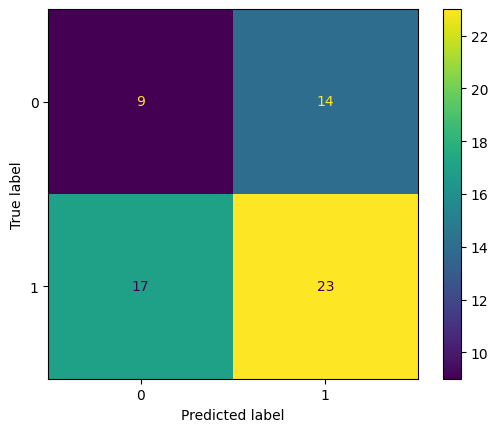

<Figure size 2400x1600 with 0 Axes>

In [79]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)
print(classification_report(y_test, weather_pred), "\n")
plt.figure(figsize=(12,8), dpi=200)